# ***Mount google drive***

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Healthcare_Projects_Machine_Learning/Pima_Indian_Diabetes_Prediction/
!ls

/content/gdrive/MyDrive/Healthcare_Projects_Machine_Learning/Pima_Indian_Diabetes_Prediction
catboost_info  Dataset	Model_Output  Pima_Indian_Diabetes_Prediction.ipynb


# ***Installation libraries***

In [ ]:
!pip install ycimpute
!pip install catboost

# ***Import libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, recall_score, precision_score
from ycimpute.imputer import knnimput
import catboost as ctb
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# ***Data collection and analysis***
**PIMA DIABETES DATASET**

In [ ]:
# Loading the pima diabetes dataset to pandas dataframe
diabetes_dataframe = pd.read_csv('./Dataset/diabetes.csv', na_values={'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0})

In [ ]:
diabetes_dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


**Explain atrributes of diabetes dataframe**


1.   Pregnancies: Số lần mang thai
2.   Glucose: Nồng độ glucose trong huyết tương sau 2 giờ xét nghiệm dung nạp glucose qua đường miệng
3. BloodPressure: Huyết áp tâm trương (mmHg)
4. SkinThickness: Độ dày nếp gấp da cơ tam đầu (mm)
5. Insulin: Insulin huyết thanh trong 2 giờ (mu U/ml)
6. BMI: Chỉ số khối cơ thể (được tính bằng trọng lượng (kg) / chiều cao (m) ^ 2)
7. DiabetesPedigreeFunction: Chức năng phả hệ bệnh tiểu đường
8. Age: Tuổi





**ANALYSIS DATASET**

In [ ]:
# Description diabetes dataframe
diabetes_dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Count the missing value in diabetes dataframe
value_null = diabetes_dataframe.isnull().sum()
key_null = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
percentage_null = []
for i in range(5):
  percentage_null.append(round(value_null[key_null[i]] / diabetes_dataframe.shape[0] * 100, 2))

print(" The number of missing values ".center(50, '#'))
print(value_null)
print(" The percentage of missing values ".center(50, '#'))
print(percentage_null)

########## The number of missing values ##########
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
######## The percentage of missing values ########
[0.65, 4.56, 29.56, 48.7, 1.43]


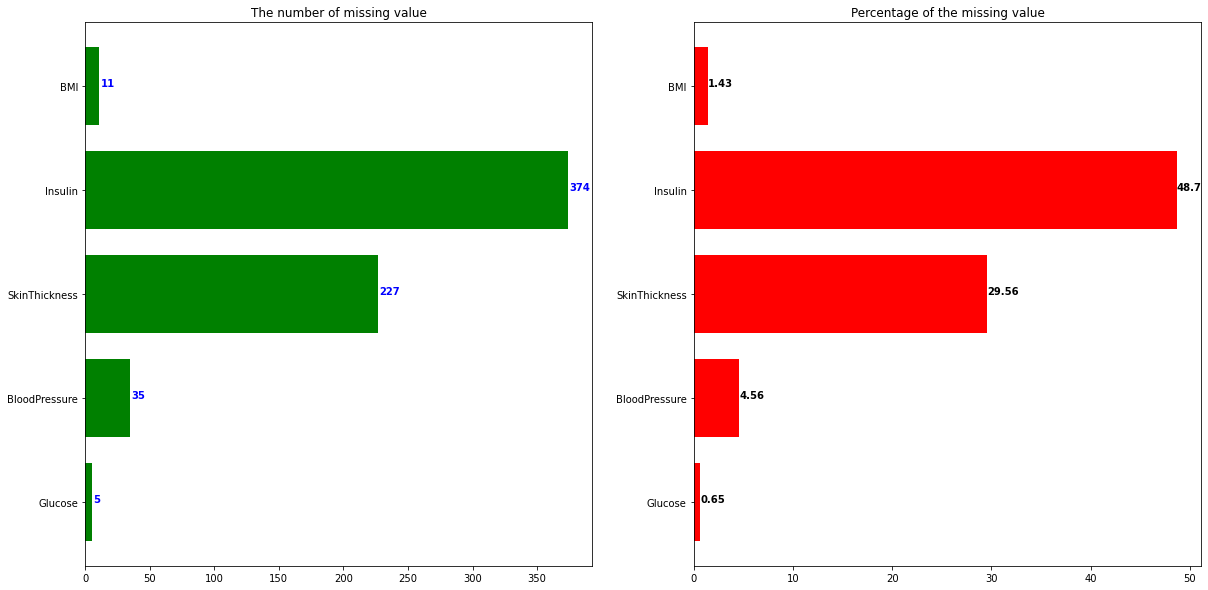

In [ ]:
# Plot the missing value and percentage of missing value
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].set_title('The number of missing value')
ax[0].barh(key_null, value_null[1:6], 0.75, color='green')
for i, v in enumerate(value_null[1:6]):
  ax[0].text(v + 1, i, str(v), color = 'blue', fontweight = 'bold')

ax[1].set_title('Percentage of the missing value')
ax[1].barh(key_null, percentage_null, 0.75, color='red')
for i, v in enumerate(percentage_null):
  ax[1].text(v, i, str(v), color='black', fontweight= 'bold')

plt.show()

In [ ]:
# Count the numbers of Outcome values
diabetes_dataframe['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

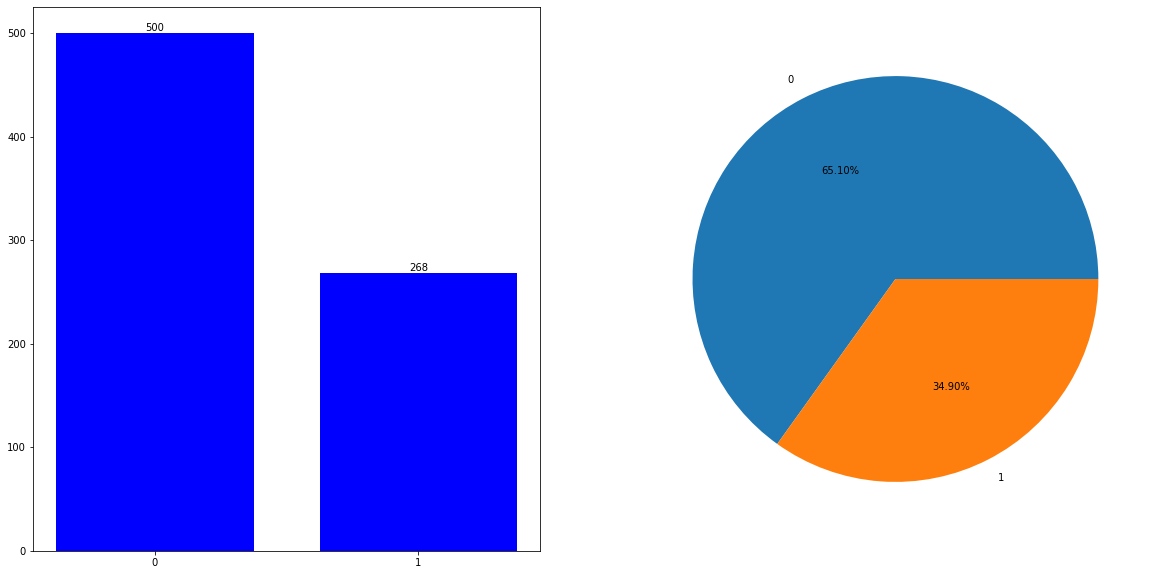

In [ ]:
# Plot the number of Outcome values
X = [0, 1]
Y = [500, 268]
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

bar_plot = ax[0].bar(X, Y, width=0.75, color='blue', tick_label=X)
for idx,rect in enumerate(bar_plot):
  height = rect.get_height()
  ax[0].text(rect.get_x() + rect.get_width()/2., height, Y[idx],ha='center', va='bottom', rotation=0)

ax[1].pie(Y, labels=X, autopct='%.2f%%')

plt.show()

# ***Preprocessing dataset***

**GLUCOSE ATTRIBUTE**

In [ ]:
# Show the null data of Glucose attribute
diabetes_dataframe.loc[diabetes_dataframe['Glucose'].isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1


In [ ]:
# Show the mean and median of Glucose column
diabetes_dataframe.groupby(['Outcome']).agg({'Glucose':['mean','median']})

Glucose       
               mean median
Outcome                   
0        110.643863  107.0
1        142.319549  140.0

In [ ]:
# Fill null value in Glucose column by median value of that column
diabetes_dataframe['Glucose'] = diabetes_dataframe['Glucose'].fillna(diabetes_dataframe.groupby('Outcome')['Glucose'].transform('median'))
print(diabetes_dataframe.isnull().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# Description diabetes dataframe
diabetes_dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**BMI ATRRIBUTE**

In [ ]:
# Show the null data of BMI attribute
diabetes_dataframe.loc[diabetes_dataframe['BMI'].isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0
145,0,102.0,75.0,23.0,NaN,NaN,0.572,21,0
371,0,118.0,64.0,23.0,89.0,NaN,1.731,21,0
426,0,94.0,NaN,NaN,NaN,NaN,0.256,25,0
494,3,80.0,NaN,NaN,NaN,NaN,0.174,22,0
522,6,114.0,NaN,NaN,NaN,NaN,0.189,26,0
684,5,136.0,82.0,NaN,NaN,NaN,0.640,69,0


In [ ]:
# Show the mean and median of BMI column
diabetes_dataframe.groupby(['Outcome']).agg({'BMI':['mean','median']})

BMI       
              mean median
Outcome                  
0        30.859674   30.1
1        35.406767   34.3

In [ ]:
# Fill null value in BMI column by median value of that column
diabetes_dataframe['BMI'] = diabetes_dataframe['BMI'].fillna(diabetes_dataframe.groupby('Outcome')['BMI'].transform('median'))
print(diabetes_dataframe.isnull().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# Description diabetes dataframe
diabetes_dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,733.000000,541.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.405184,29.153420,155.548223,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.382158,10.476982,118.775855,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**BLOODPRESURE**

In [ ]:
# Show the null data of BloodPressure attribute
diabetes_dataframe.loc[diabetes_dataframe['BloodPressure'].isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
15,7,100.0,NaN,NaN,NaN,30.0,0.484,32,1
49,7,105.0,NaN,NaN,NaN,30.1,0.305,24,0
60,2,84.0,NaN,NaN,NaN,30.1,0.304,21,0
78,0,131.0,NaN,NaN,NaN,43.2,0.270,26,1
81,2,74.0,NaN,NaN,NaN,30.1,0.102,22,0
172,2,87.0,NaN,23.0,NaN,28.9,0.773,25,0
193,11,135.0,NaN,NaN,NaN,52.3,0.578,40,1
222,7,119.0,NaN,NaN,NaN,25.2,0.209,37,0
261,3,141.0,NaN,NaN,NaN,30.0,0.761,27,1


In [ ]:
# Fill null values in BloodPressure with Nearest neightbor imputation
df_BP = diabetes_dataframe
df_BP = df_BP.drop(columns=['SkinThickness', 'Insulin'])
var_names = list(df_BP)
np_df_impute = np.array(df_BP)
imputed = knnimput.KNN(k = 7).complete(np_df_impute)
df_imputed = pd.DataFrame(imputed, columns=var_names)
df_imputed['SkinThickness'] = diabetes_dataframe['SkinThickness']
df_imputed['Insulin'] = diabetes_dataframe['Insulin']

Imputing row 1/768 with 0 missing, elapsed time: 0.122
Imputing row 101/768 with 0 missing, elapsed time: 0.123
Imputing row 201/768 with 0 missing, elapsed time: 0.124
Imputing row 301/768 with 1 missing, elapsed time: 0.125
Imputing row 401/768 with 0 missing, elapsed time: 0.126
Imputing row 501/768 with 0 missing, elapsed time: 0.127
Imputing row 601/768 with 0 missing, elapsed time: 0.128
Imputing row 701/768 with 0 missing, elapsed time: 0.128


In [ ]:
df_imputed

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness,Insulin
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0,35.0,NaN
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0,29.0,NaN
2,8.0,183.0,64.0,23.3,0.672,32.0,1.0,NaN,NaN
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0,23.0,94.0
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0,35.0,168.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0,48.0,180.0
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0,27.0,NaN
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0,23.0,112.0
766,1.0,126.0,60.0,30.1,0.349,47.0,1.0,NaN,NaN


In [ ]:
# Check the number of missing values
diabetes_dataframe = df_imputed
print(diabetes_dataframe.isnull().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                 0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
SkinThickness               227
Insulin                     374
dtype: int64


In [ ]:
# Description diabates dataframe
diabetes_dataframe.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness,Insulin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,541.000000,394.000000
mean,3.845052,121.677083,72.312643,32.434635,0.471876,33.240885,0.348958,29.153420,155.548223
std,3.369578,30.464161,12.175704,6.880498,0.331329,11.760232,0.476951,10.476982,118.775855
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000,7.000000,14.000000
25%,1.000000,99.750000,64.000000,27.500000,0.243750,24.000000,0.000000,22.000000,76.250000
50%,3.000000,117.000000,72.000000,32.050000,0.372500,29.000000,0.000000,29.000000,125.000000
75%,6.000000,140.250000,80.000000,36.600000,0.626250,41.000000,1.000000,36.000000,190.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000,99.000000,846.000000


**BMI CAT**


*   If your BMI is less than 18.5, it falls within the underweight range.
*   If your BMI is 18.5 to <25, it falls within the healthy weight range.
* If your BMI is 25.0 to <30, it falls within the overweight range.
* If your BMI is 30.0 or higher, it falls within the obesity range.



In [ ]:
# Create column BMI CAT
bmi_labels = ['Underweight','Healthy Weight','Overweight','Obesity']
diabetes_dataframe['BMI_Cat'] = pd.cut(diabetes_dataframe['BMI'],[0,18.5,25,30,diabetes_dataframe['BMI'].max()],labels=bmi_labels)
diabetes_dataframe

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness,Insulin,BMI_Cat
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0,35.0,NaN,Obesity
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0,29.0,NaN,Overweight
2,8.0,183.0,64.0,23.3,0.672,32.0,1.0,NaN,NaN,Healthy Weight
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0,23.0,94.0,Overweight
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0,35.0,168.0,Obesity
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0,48.0,180.0,Obesity
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0,27.0,NaN,Obesity
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0,23.0,112.0,Overweight
766,1.0,126.0,60.0,30.1,0.349,47.0,1.0,NaN,NaN,Obesity


**GLOCOSE CAT**


*   A blood sugar level less than 140 mg/dL (7.8 mmol/L) is considered normal.
*   A blood sugar level from 140 to 199 mg/dL (7.8 to 11.0 mmol/L) is considered prediabetes. This is sometimes referred to as impaired glucose tolerance.
* A blood sugar level of 200 mg/dL (11.1 mmol/L) or higher indicates type 2 diabetes.





In [ ]:
# Create Glucose Cat column
diabetes_dataframe["Glucose_Cat"] = diabetes_dataframe["Glucose"].apply(lambda x: "Normal" if x < 140 else ("Prediabetes" if 140 <= x <= 199 else "Risk"))
diabetes_dataframe

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness,Insulin,BMI_Cat,Glucose_Cat
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0,35.0,NaN,Obesity,Prediabetes
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0,29.0,NaN,Overweight,Normal
2,8.0,183.0,64.0,23.3,0.672,32.0,1.0,NaN,NaN,Healthy Weight,Prediabetes
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0,23.0,94.0,Overweight,Normal
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0,35.0,168.0,Obesity,Normal
...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0,48.0,180.0,Obesity,Normal
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0,27.0,NaN,Obesity,Normal
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0,23.0,112.0,Overweight,Normal
766,1.0,126.0,60.0,30.1,0.349,47.0,1.0,NaN,NaN,Obesity,Normal


**INSULIN**

In [ ]:
diabetes_dataframe.groupby(['BMI_Cat','Outcome','Glucose_Cat']).agg({'Insulin': ['mean', 'median']})

Insulin       
                                          mean median
BMI_Cat        Outcome Glucose_Cat                   
Underweight    0.0     Normal        82.000000   82.0
                       Prediabetes         NaN    NaN
               1.0     Normal              NaN    NaN
                       Prediabetes         NaN    NaN
Healthy Weight 0.0     Normal       101.550000   75.0
                       Prediabetes  118.000000  110.0
               1.0     Normal        48.000000   48.0
                       Prediabetes  144.000000  144.0
Overweight     0.0     Normal       100.096774   85.5
                       Prediabetes  169.375000  154.0
               1.0     Normal       194.444444  130.0
                       Prediabetes  150.777778  132.0
Obesity        0.0     Normal       121.776000  105.0
                       Prediabetes  284.600000  265.0
               1.0     Normal       149.833333  152.5
                       Prediabetes  264.500000  225.0

In [ ]:
# Fill the missing values in Insulin column with median
diabetes_dataframe['Insulin'] = diabetes_dataframe['Insulin'].fillna(diabetes_dataframe.groupby(['BMI_Cat','Outcome','Glucose_Cat'])['Insulin'].transform('median'))
# Create Insulin Cat column
diabetes_dataframe["Insulin_Cat"] = diabetes_dataframe["Insulin"].apply(lambda x: "Normal" if (16 <= x <= 166) else "Abnormal")
diabetes_dataframe

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness,Insulin,BMI_Cat,Glucose_Cat,Insulin_Cat
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0,35.0,225.0,Obesity,Prediabetes,Abnormal
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0,29.0,85.5,Overweight,Normal,Normal
2,8.0,183.0,64.0,23.3,0.672,32.0,1.0,NaN,144.0,Healthy Weight,Prediabetes,Normal
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0,23.0,94.0,Overweight,Normal,Normal
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0,35.0,168.0,Obesity,Normal,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0,48.0,180.0,Obesity,Normal,Abnormal
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0,27.0,105.0,Obesity,Normal,Normal
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0,23.0,112.0,Overweight,Normal,Normal
766,1.0,126.0,60.0,30.1,0.349,47.0,1.0,NaN,152.5,Obesity,Normal,Normal


In [ ]:
# Check the number of missing values
diabetes_dataframe = df_imputed
print(diabetes_dataframe.isnull().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                 0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
SkinThickness               227
Insulin                       0
BMI_Cat                       0
Glucose_Cat                   0
Insulin_Cat                   0
dtype: int64


**SKINTHICKNESS**

In [ ]:
diabetes_dataframe.groupby(['BMI_Cat','Outcome','Glucose_Cat','Insulin_Cat']).agg({'SkinThickness': ['mean', 'median']})

SkinThickness       
                                                        mean median
BMI_Cat        Outcome Glucose_Cat Insulin_Cat                     
Underweight    0.0     Normal      Abnormal              NaN    NaN
                                   Normal          17.000000   17.0
                       Prediabetes Abnormal              NaN    NaN
                                   Normal                NaN    NaN
               1.0     Normal      Abnormal              NaN    NaN
                                   Normal                NaN    NaN
                       Prediabetes Abnormal              NaN    NaN
                                   Normal                NaN    NaN
Healthy Weight 0.0     Normal      Abnormal        16.285714   14.0
                                   Normal          18.235294   18.0
                       Prediabetes Abnormal        26.000000   26.0
                                   Normal          18.500000   18.5
               1.0     Normal      Abnormal              NaN    NaN
                                   Normal          13.000000   13.0
                       Prediabetes Abnormal              NaN    NaN
                                   Normal          17.000000   17.0
Overweight     0.0     Normal      Abnormal        18.375000   18.5
                                   Normal          22.524390   22.5
                       Prediabetes Abnormal        25.500000   26.5
                                   Normal          30.000000   29.5
               1.0     Normal      Abnormal        17.666667   22.0
                                   Normal          25.866667   24.0
                       Prediabetes Abnormal        23.666667   19.0
                                   Normal          24.142857   23.0
Obesity        0.0     Normal      Abnormal        34.000000   33.0
                                   Normal          32.107914   32.0
                       Prediabetes Abnormal        32.625000   32.5
                                   Normal          31.375000   30.5
               1.0     Normal      Abnormal        36.526316   37.0
                                   Normal          34.195652   32.0
                       Prediabetes Abnormal        35.132353   33.0
                                   Normal          33.705882   33.0

In [ ]:
# Fill the missing value in SkinThickness column with mean
diabetes_dataframe['SkinThickness'] = diabetes_dataframe['SkinThickness'].fillna(diabetes_dataframe.groupby(['BMI_Cat','Outcome','Glucose_Cat','Insulin_Cat'])['SkinThickness'].transform('mean'))
diabetes_dataframe

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness,Insulin,BMI_Cat,Glucose_Cat,Insulin_Cat
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0,35.000000,225.0,Obesity,Prediabetes,Abnormal
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0,29.000000,85.5,Overweight,Normal,Normal
2,8.0,183.0,64.0,23.3,0.672,32.0,1.0,17.000000,144.0,Healthy Weight,Prediabetes,Normal
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0,23.000000,94.0,Overweight,Normal,Normal
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0,35.000000,168.0,Obesity,Normal,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0,48.000000,180.0,Obesity,Normal,Abnormal
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0,27.000000,105.0,Obesity,Normal,Normal
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0,23.000000,112.0,Overweight,Normal,Normal
766,1.0,126.0,60.0,30.1,0.349,47.0,1.0,34.195652,152.5,Obesity,Normal,Normal


In [ ]:
# Check the number of missing values
diabetes_dataframe = df_imputed
print(diabetes_dataframe.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
SkinThickness               0
Insulin                     0
BMI_Cat                     0
Glucose_Cat                 0
Insulin_Cat                 0
dtype: int64


**PREGNANCIES RATE**

In [ ]:
# Create Pregnancies Rate column
diabetes_dataframe['Preg_Rate'] = diabetes_dataframe['Pregnancies'] / diabetes_dataframe['Age']
diabetes_dataframe

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness,Insulin,BMI_Cat,Glucose_Cat,Insulin_Cat,Preg_Rate
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0,35.000000,225.0,Obesity,Prediabetes,Abnormal,0.120000
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0,29.000000,85.5,Overweight,Normal,Normal,0.032258
2,8.0,183.0,64.0,23.3,0.672,32.0,1.0,17.000000,144.0,Healthy Weight,Prediabetes,Normal,0.250000
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0,23.000000,94.0,Overweight,Normal,Normal,0.047619
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0,35.000000,168.0,Obesity,Normal,Abnormal,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0,48.000000,180.0,Obesity,Normal,Abnormal,0.158730
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0,27.000000,105.0,Obesity,Normal,Normal,0.074074
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0,23.000000,112.0,Overweight,Normal,Normal,0.166667
766,1.0,126.0,60.0,30.1,0.349,47.0,1.0,34.195652,152.5,Obesity,Normal,Normal,0.021277


**GLUCOSE/INSULIN RATE**

In [ ]:
# Create Glucose/Insulin rate column
diabetes_dataframe['GluIns_Rate'] = diabetes_dataframe['Glucose'] / diabetes_dataframe['Insulin']
diabetes_dataframe

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness,Insulin,BMI_Cat,Glucose_Cat,Insulin_Cat,Preg_Rate,GluIns_Rate
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0,35.000000,225.0,Obesity,Prediabetes,Abnormal,0.120000,0.657778
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0,29.000000,85.5,Overweight,Normal,Normal,0.032258,0.994152
2,8.0,183.0,64.0,23.3,0.672,32.0,1.0,17.000000,144.0,Healthy Weight,Prediabetes,Normal,0.250000,1.270833
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0,23.000000,94.0,Overweight,Normal,Normal,0.047619,0.946809
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0,35.000000,168.0,Obesity,Normal,Abnormal,0.000000,0.815476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0,48.000000,180.0,Obesity,Normal,Abnormal,0.158730,0.561111
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0,27.000000,105.0,Obesity,Normal,Normal,0.074074,1.161905
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0,23.000000,112.0,Overweight,Normal,Normal,0.166667,1.080357
766,1.0,126.0,60.0,30.1,0.349,47.0,1.0,34.195652,152.5,Obesity,Normal,Normal,0.021277,0.826230


# **Preparation Dataset**

**ENCODING DATA**

In [ ]:
diabetes_dataframe

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness,Insulin,BMI_Cat,Glucose_Cat,Insulin_Cat,Preg_Rate,GluIns_Rate
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0,35.000000,225.0,Obesity,Prediabetes,Abnormal,0.120000,0.657778
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0,29.000000,85.5,Overweight,Normal,Normal,0.032258,0.994152
2,8.0,183.0,64.0,23.3,0.672,32.0,1.0,17.000000,144.0,Healthy Weight,Prediabetes,Normal,0.250000,1.270833
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0,23.000000,94.0,Overweight,Normal,Normal,0.047619,0.946809
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0,35.000000,168.0,Obesity,Normal,Abnormal,0.000000,0.815476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0,48.000000,180.0,Obesity,Normal,Abnormal,0.158730,0.561111
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0,27.000000,105.0,Obesity,Normal,Normal,0.074074,1.161905
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0,23.000000,112.0,Overweight,Normal,Normal,0.166667,1.080357
766,1.0,126.0,60.0,30.1,0.349,47.0,1.0,34.195652,152.5,Obesity,Normal,Normal,0.021277,0.826230


In [ ]:
# Encoding BMI Cat column
bmi_dict = {'Obesity': 3,
           'Overweight' : 2,
           'Healthy Weight': 1,
           'Underweight' : 0}

for key in bmi_dict.keys():
    diabetes_dataframe['BMI_Cat'] = diabetes_dataframe['BMI_Cat'].replace(key, bmi_dict[key])

diabetes_dataframe['BMI_Cat'] = diabetes_dataframe['BMI_Cat'].astype(int)
diabetes_dataframe

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness,Insulin,BMI_Cat,Glucose_Cat,Insulin_Cat,Preg_Rate,GluIns_Rate
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0,35.000000,225.0,3,Prediabetes,Abnormal,0.120000,0.657778
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0,29.000000,85.5,2,Normal,Normal,0.032258,0.994152
2,8.0,183.0,64.0,23.3,0.672,32.0,1.0,17.000000,144.0,1,Prediabetes,Normal,0.250000,1.270833
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0,23.000000,94.0,2,Normal,Normal,0.047619,0.946809
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0,35.000000,168.0,3,Normal,Abnormal,0.000000,0.815476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0,48.000000,180.0,3,Normal,Abnormal,0.158730,0.561111
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0,27.000000,105.0,3,Normal,Normal,0.074074,1.161905
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0,23.000000,112.0,2,Normal,Normal,0.166667,1.080357
766,1.0,126.0,60.0,30.1,0.349,47.0,1.0,34.195652,152.5,3,Normal,Normal,0.021277,0.826230


In [ ]:
# Encoding Glucose Cat column
glu_dict = {'Risk': 2,
           'Prediabetes' : 1,
           'Normal': 0}

for key in glu_dict.keys():
    diabetes_dataframe['Glucose_Cat'] = diabetes_dataframe['Glucose_Cat'].replace(key, glu_dict[key])

diabetes_dataframe['Glucose_Cat'] = diabetes_dataframe['Glucose_Cat'].astype(int)
diabetes_dataframe

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness,Insulin,BMI_Cat,Glucose_Cat,Insulin_Cat,Preg_Rate,GluIns_Rate
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0,35.000000,225.0,3,1,Abnormal,0.120000,0.657778
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0,29.000000,85.5,2,0,Normal,0.032258,0.994152
2,8.0,183.0,64.0,23.3,0.672,32.0,1.0,17.000000,144.0,1,1,Normal,0.250000,1.270833
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0,23.000000,94.0,2,0,Normal,0.047619,0.946809
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0,35.000000,168.0,3,0,Abnormal,0.000000,0.815476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0,48.000000,180.0,3,0,Abnormal,0.158730,0.561111
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0,27.000000,105.0,3,0,Normal,0.074074,1.161905
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0,23.000000,112.0,2,0,Normal,0.166667,1.080357
766,1.0,126.0,60.0,30.1,0.349,47.0,1.0,34.195652,152.5,3,0,Normal,0.021277,0.826230


In [ ]:
# Encoding Insulin Cat column
ins_dict = {'Normal' : 1, 'Abnormal': 0}

for key in ins_dict.keys():
    diabetes_dataframe['Insulin_Cat'] = diabetes_dataframe['Insulin_Cat'].replace(key, ins_dict[key])

diabetes_dataframe['Insulin_Cat'] = diabetes_dataframe['Insulin_Cat'].astype(int)
diabetes_dataframe

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness,Insulin,BMI_Cat,Glucose_Cat,Insulin_Cat,Preg_Rate,GluIns_Rate
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0,35.000000,225.0,3,1,0,0.120000,0.657778
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0,29.000000,85.5,2,0,1,0.032258,0.994152
2,8.0,183.0,64.0,23.3,0.672,32.0,1.0,17.000000,144.0,1,1,1,0.250000,1.270833
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0,23.000000,94.0,2,0,1,0.047619,0.946809
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0,35.000000,168.0,3,0,0,0.000000,0.815476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0,48.000000,180.0,3,0,0,0.158730,0.561111
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0,27.000000,105.0,3,0,1,0.074074,1.161905
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0,23.000000,112.0,2,0,1,0.166667,1.080357
766,1.0,126.0,60.0,30.1,0.349,47.0,1.0,34.195652,152.5,3,0,1,0.021277,0.826230


**TRAIN TEST SLPIT DATASET**

In [ ]:
# Train test split dataset
df = diabetes_dataframe.copy()
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

# Scaling Data
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state = 42)

In [ ]:
X_train

array([[-0.54791859, -1.23757346, -0.20075623, ...,  0.5953968 ,
        -0.15870167, -0.39937693],
       [ 1.53084665, -0.31786169,  0.79614859, ...,  0.5953968 ,
         0.87831244, -0.31466636],
       [-0.84488505,  0.56900323, -2.16248604, ...,  0.5953968 ,
        -0.76777533,  0.80468689],
       ...,
       [ 1.82781311, -0.67917703,  1.12488577, ...,  0.5953968 ,
         1.8957024 , -0.58893419],
       [-1.14185152,  0.63469692,  0.04482413, ..., -1.67955218,
        -1.32388607, -0.63797837],
       [-1.14185152,  0.10914734,  1.94672873, ...,  0.5953968 ,
        -1.32388607,  0.79363029]])

# ***Training dataset with classification algorithm***

In [ ]:
# Function show evaluated result
def result(classifier):
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  roc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])
  f1 = f1_score(y_test, y_pred)
  recall = recall_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  print("Confusion Matrix: \n", cm)
  print("Accuracy score: ", acc)
  print("ROC-AUC: ", roc)
  print("F1 score: ", f1)
  print("Recall score: ", recall)
  print("Precision score: ", precision)
  return np.array([acc, roc, f1, recall, precision])

# Array save results of classifiers
result_classifier = []

**RANDOM FOREST CLASSIFIER**

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf_arr = result(rf)
result_classifier.append(rf_arr)

Confusion Matrix: 
 [[86 13]
 [ 9 46]]
Accuracy score:  0.8571428571428571
ROC-AUC:  0.9223140495867769
F1 score:  0.8070175438596492
Recall score:  0.8363636363636363
Precision score:  0.7796610169491526


**SUPPORT VECTOR CLASSIFIER**

In [ ]:
svc = SVC(random_state = 42, probability = True)
svc_arr = result(svc)
result_classifier.append(svc_arr)

Confusion Matrix: 
 [[83 16]
 [18 37]]
Accuracy score:  0.7792207792207793
ROC-AUC:  0.8433425160697888
F1 score:  0.6851851851851852
Recall score:  0.6727272727272727
Precision score:  0.6981132075471698


**TUNE CATBOOST**

In [ ]:
catboost_param_grid = {'loss_function': ['Logloss', 'CrossEntropy'],
                       'iterations': [500, 700, 1000],
                       'depth': [3, 4, 5],
                       'learning_rate': [0.01, 0.03, 0.05, 0.1]}

catboost_tuned = GridSearchCV(ctb.CatBoostClassifier(random_state = 42,
                                                 verbose = False),
                              param_grid = catboost_param_grid,
                              cv = 5,
                              scoring = 'f1',
                              n_jobs = -1,
                              verbose = 2)

ctb_arr = result(catboost_tuned)
result_classifier.append(ctb_arr)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  7.5min finished


Confusion Matrix: 
 [[87 12]
 [ 9 46]]
Accuracy score:  0.8636363636363636
ROC-AUC:  0.92910927456382
F1 score:  0.8141592920353982
Recall score:  0.8363636363636363
Precision score:  0.7931034482758621


**COMPARE TRAINED RESULT AMONG THE MODELS**

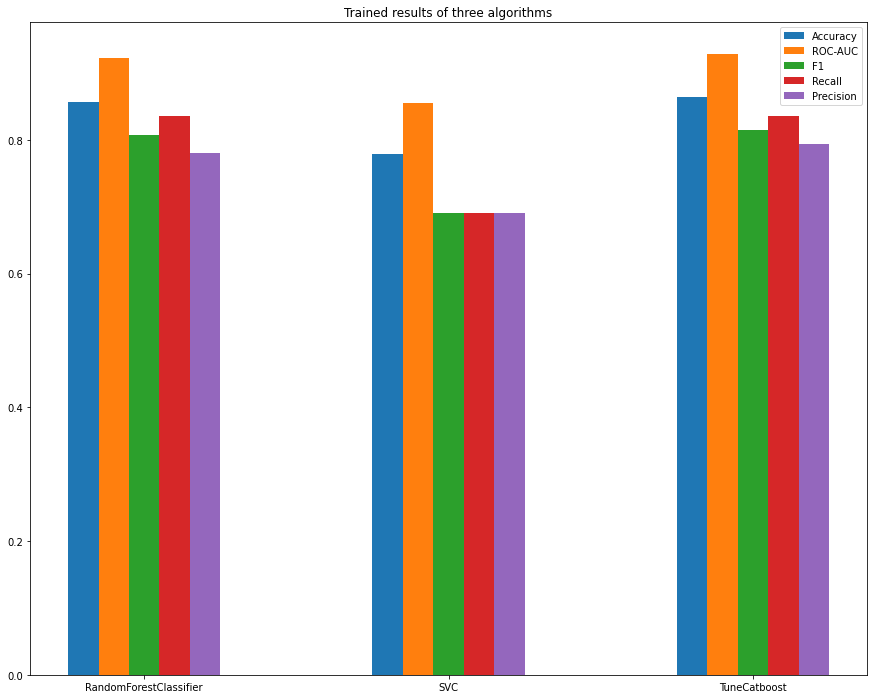

In [ ]:
X_col = ['RandomForestClassifier', 'SVC', 'TuneCatboost']
X_axis = np.arange(len(X_col))

plt.figure(figsize=(15, 12))
plt.bar(X_axis, [result_classifier[0][0], result_classifier[1][0], result_classifier[2][0]], width=0.1,label='Accuracy')
plt.bar(X_axis + 0.1, [result_classifier[0][1], result_classifier[1][1], result_classifier[2][1]], width=0.1,label='ROC-AUC')
plt.bar(X_axis + 0.2, [result_classifier[0][2], result_classifier[1][2], result_classifier[2][2]], width=0.1,label='F1')
plt.bar(X_axis + 0.3, [result_classifier[0][3], result_classifier[1][3], result_classifier[2][3]], width=0.1,label='Recall')
plt.bar(X_axis + 0.4, [result_classifier[0][4], result_classifier[1][4], result_classifier[2][4]], width=0.1,label='Precision')

plt.xticks(X_axis+0.2, X_col)
plt.title("Trained results of three algorithms")
plt.legend()
plt.show()

# ***SAVE MODEL TRAINED***

In [ ]:
joblib.dump(rf, f'./Model_Output/rf.pkl')
joblib.dump(svc, f'./Model_Output/svc.pkl')
joblib.dump(catboost_tuned, f'./Model_Output/catboost.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['./Model_Output/catboost.pkl']

# ***TEST MODEL WITH INPUT DATA***

In [ ]:
diabetes_dataframe

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness,Insulin,BMI_Cat,Glucose_Cat,Insulin_Cat,Preg_Rate,GluIns_Rate
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0,35.000000,225.0,3,1,0,0.120000,0.657778
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0,29.000000,85.5,2,0,1,0.032258,0.994152
2,8.0,183.0,64.0,23.3,0.672,32.0,1.0,17.000000,144.0,1,1,1,0.250000,1.270833
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0,23.000000,94.0,2,0,1,0.047619,0.946809
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0,35.000000,168.0,3,0,0,0.000000,0.815476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0,48.000000,180.0,3,0,0,0.158730,0.561111
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0,27.000000,105.0,3,0,1,0.074074,1.161905
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0,23.000000,112.0,2,0,1,0.166667,1.080357
766,1.0,126.0,60.0,30.1,0.349,47.0,1.0,34.195652,152.5,3,0,1,0.021277,0.826230


In [ ]:
input_data = (6, 148, 72, 33.6, 0.672, 50, 35, 225)
input_data = list(input_data)
# BMI CAT
if input_data[3] > 0 and input_data[3] < 18.5:
  input_data.append(0)
elif input_data[3] >= 18.5 and input_data[3] < 25:
  input_data.append(1)
elif input_data[3] >= 25 and input_data[3] < 30:
  input_data.append(2)
else:
  input_data.append(3)

# Glucose Cat
if input_data[1] > 0 and input_data[1] < 140:
  input_data.append(0)
elif input_data[1] >= 140 and input_data[1] <= 199:
  input_data.append(1)
else:
  input_data.append(2)

# Insulin Cat
if input_data[7] >= 16 and input_data[7] <= 166:
  input_data.append(0)
else:
  input_data.append(1)

# Pregnancies Rate
input_data.append(input_data[0] / input_data[5])

# Glucose / Insulin Rate
input_data.append(input_data[1] / input_data[7])

# Scaling data input
input_data_tp = tuple(input_data)
input_data_np = np.array(input_data_tp)
input_data_np_re = input_data_np.reshape(1, -1)
std_input_data = scaler.transform(input_data_np_re)

# Predict input data
rf_from_joblib = joblib.load(f'./Model_Output/rf.pkl')
prediction = rf_from_joblib.predict(std_input_data)
print(prediction, std_input_data)

[1.] [[ 0.63994726  0.86462486 -0.02569436  0.16948251  0.60439732  1.4259954
   0.64461089  0.87032032  0.70894901  1.69094544  0.5953968   0.14424627
  -0.59515247]]


In [ ]:
X.to_csv('data.csv', index=False, header=True)